# DDM
- การประเมินมูลค่าหุ้น

<b>Dividend Discount Model (DDM)</b><br>
การประเมินมูลค่าหุ้นซึ่งใช้ในการคำนวณมูลค่าของหุ้นโดยพิจารณาจาก เงินปันผลที่หุ้นนั้นจะจ่ายในอนาคต เหมาะสำหรับบริษัทที่มีการจ่ายเงินปันผลสม่ำเสมอ

![image](DDM.png)

<b>ตัวอย่าง</b><br>
ตัวอย่างการใช้ DDM ในการประเมินมูลค่าหุ้น
สมมติว่าบริษัท A จ่ายเงินปันผลในปีถัดไปที่คาดว่าจะเป็น 5 บาทต่อหุ้น อัตราผลตอบแทนที่นักลงทุนต้องการคือ 10% และคาดการณ์ว่าเงินปันผลจะเติบโตในอัตรา 3% ต่อปี

In [950]:
# ใช้สูตร DDM  
D1 = 5
r = .10
g = .03
P0 = D1/(r-g)
print(P0)
# ดังนั้น มูลค่าหุ้นที่คำนวณได้ตาม DDM คือ 71.43 บาทต่อหุ้น

71.42857142857142


In [68]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

import pandas as pd 
import yfinance as yf

symbol = 'MC'

stock = yf.Ticker(symbol+".BK")
dividends = stock.dividends

div = pd.DataFrame(dividends)

div.index = pd.to_datetime(div.index).date#.astype(str) 
div = div.reset_index()
div.columns = ['Date','Dividends']
div.tail(5)

Date  Dividends
19  2022-02-24       0.32
20  2022-11-03       0.28
21  2023-02-22       0.45
22  2023-11-02       0.36
23  2024-02-28       0.50

กรณีมีปันผลรอประกาศก่อนเวลา<br>
![image](div_plus.png)

In [20]:
# สร้าง DataFrame ที่มี datetime index
new_div = pd.DataFrame({'Dividends': [0.4]}, index=pd.to_datetime(['2024-10-31']))
new_div['Date'] = new_div.index.date
new_div['Date'] = pd.DatetimeIndex(new_div['Date']) 

new_div = new_div[['Date','Dividends']]
new_div

Date  Dividends
2024-10-31 2024-10-31        0.4

In [22]:
div = pd.concat([div[['Date','Dividends']],new_div[['Date','Dividends']]])
div = div[['Date','Dividends']]
div = div.set_index('Date')
div.index =  pd.to_datetime(div.index)
div.tail(5)

Dividends
Date                 
2022-11-03       0.28
2023-02-22       0.45
2023-11-02       0.36
2024-02-28       0.50
2024-10-31       0.40

In [24]:
div.index.year

Index([2013, 2013, 2013, 2014, 2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018,
       2018, 2019, 2019, 2020, 2020, 2021, 2021, 2022, 2022, 2023, 2023, 2024,
       2024],
      dtype='int32', name='Date')

In [26]:
mean_ = div['Dividends'].mean()
mean_

0.3356

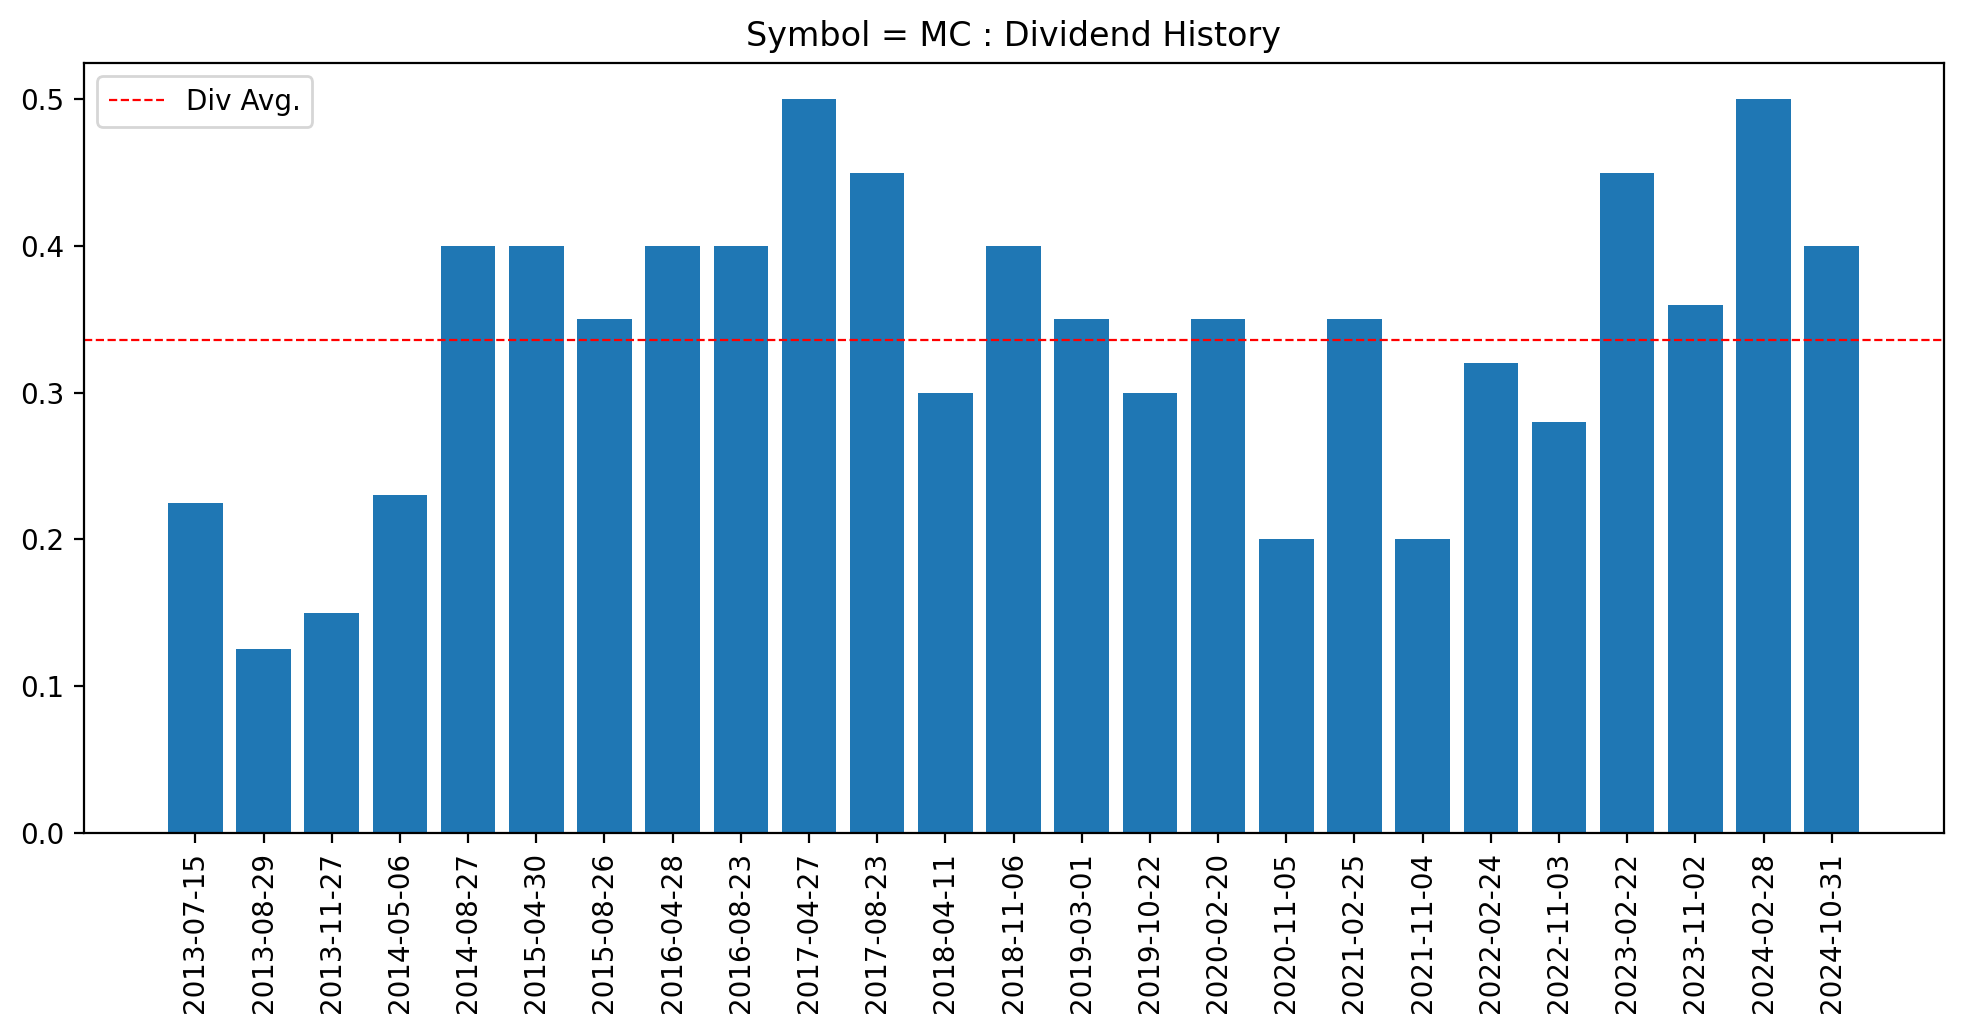

In [28]:
from datetime import datetime
plt.subplots(figsize=(12,5))
plt.title(f'Symbol = {symbol} : Dividend History')
div['Date'] = pd.to_datetime(div.index).date.astype(str) # ตัดเวลาออกไป
div = div[['Date','Dividends']]

plt.bar(x=div['Date'],height=div['Dividends'])
plt.axhline(mean_, color='red',linewidth=0.8,linestyle='--',label='Div Avg.')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [30]:
# รวมปันผลเป็นรายปี
div['year'] = div.index.year
divYear = div.groupby('year')[['Dividends']].sum()
divYear

Dividends
year           
2013       0.50
2014       0.63
2015       0.75
2016       0.80
2017       0.95
2018       0.70
2019       0.65
2020       0.55
2021       0.55
2022       0.60
2023       0.81
2024       0.90

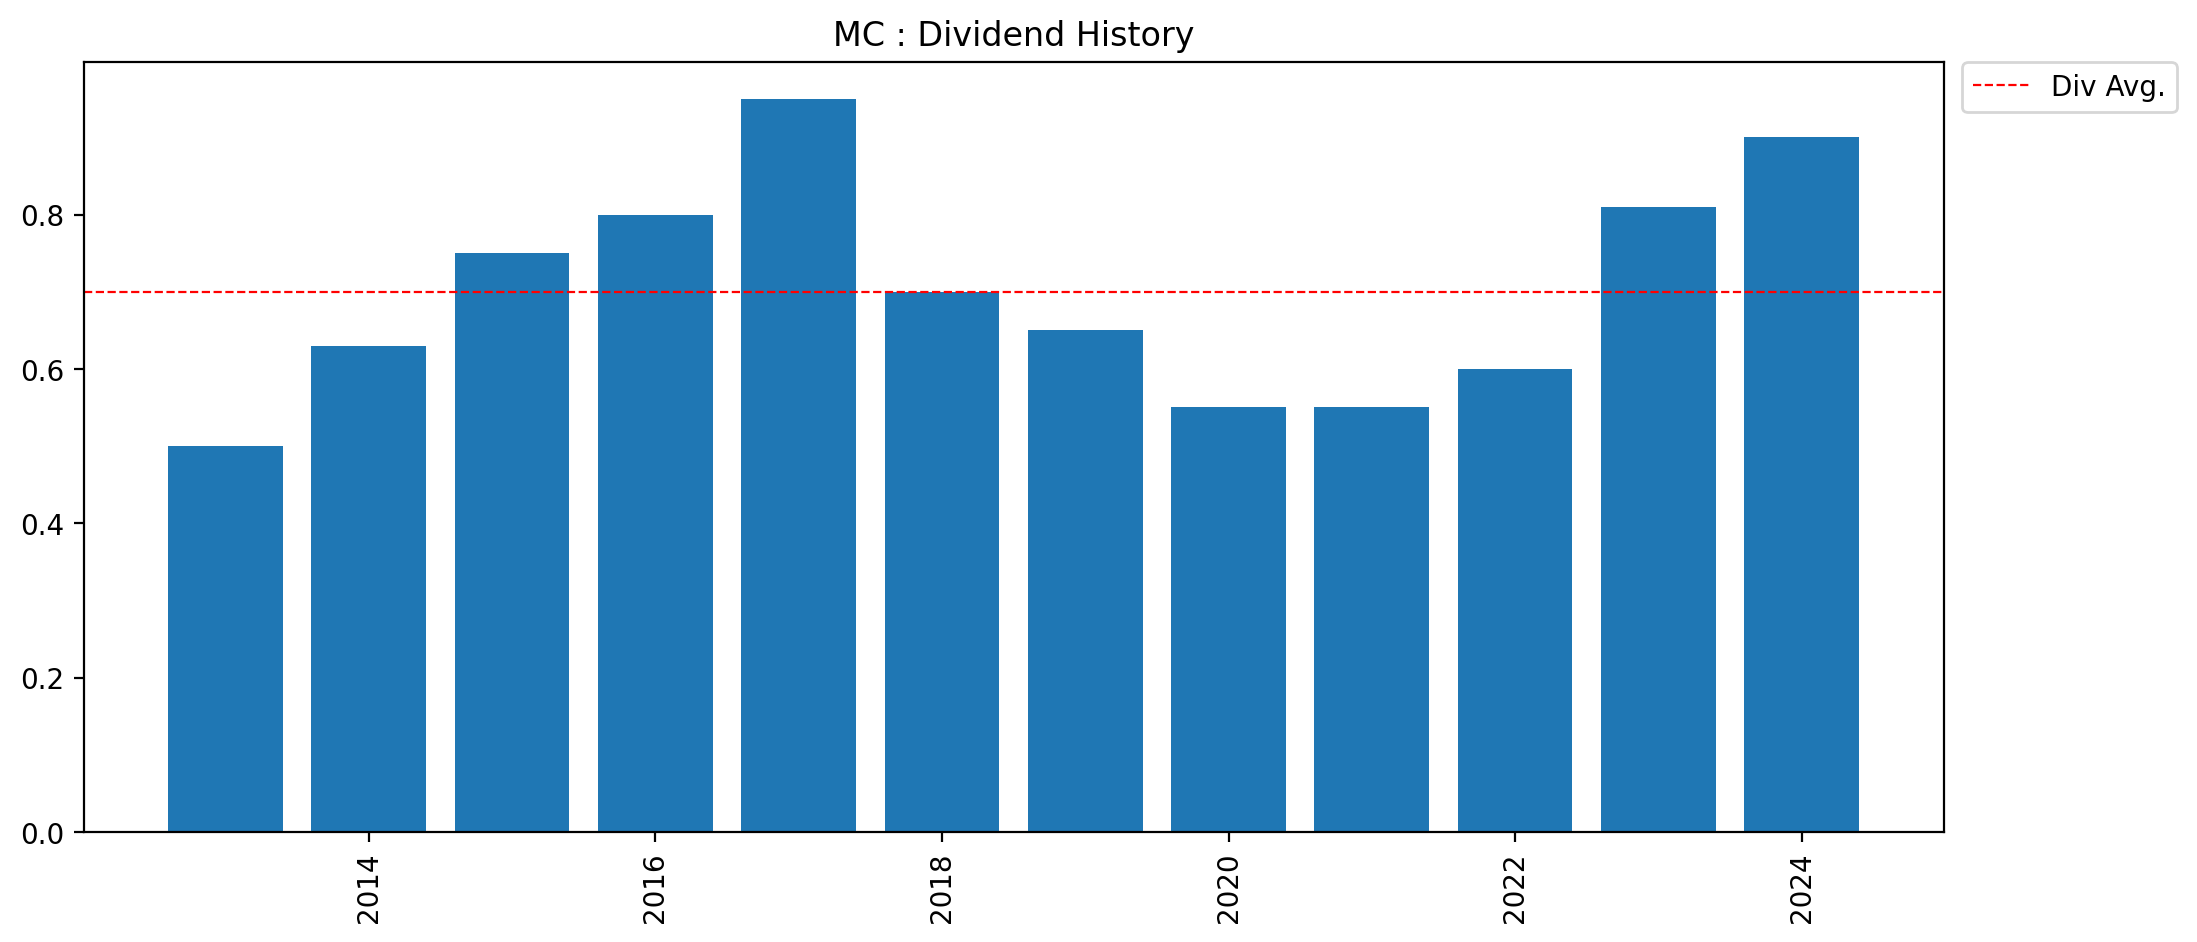

In [32]:
from datetime import datetime
plt.subplots(figsize=(12,5))
plt.title(f'{symbol} : Dividend History')

mean_ = divYear['Dividends'].mean()

plt.bar(x=divYear.index,height=divYear['Dividends'])
plt.axhline(mean_, color='red',linewidth=0.8,linestyle='--',label='Div Avg.')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.01,1.00), loc='upper left', borderaxespad=0.)
plt.show()

In [62]:
def Dividend_Discount_Model(df,requiredRateReturn):
    dividend_start = df.head(1)['Dividends'].values[0]
    dividend_end = df.tail(1)['Dividends'].values[0]
    years = len(divYear)
    
    growth_rate = (dividend_end / dividend_start) ** (1 / years) - 1

    D1 = dividend_end*(1+growth_rate)
    r = requiredRateReturn
    g = growth_rate
    
    P0 = D1/(r-g)
    return P0,g,D1

In [64]:
# ประเมินมูลค่าหุ้น ด้วย Dividend Discount Model
# กำหนด ผลตอบแทนที่ต้องการ คือ 10%
P0,growth_rate,D1 = Dividend_Discount_Model(divYear,requiredRateReturn=0.12)
print(f'P0 = {round(P0,2)}')
print(f'Dividend Growth Rate = {round(growth_rate*100,2)}%')
print(f'Dividend Year {divYear.head(1).index[0]} : {divYear.head(1)['Dividends'].values[0]}')
print(f'Dividend Year {divYear.tail(1).index[0]} : {divYear.tail(1)['Dividends'].values[0]}')

P0 = 13.54
Dividend Growth Rate = 5.02%
Dividend Year 2013 : 0.5
Dividend Year 2024 : 0.9


In [44]:
divYear

Dividends
year           
2013       0.50
2014       0.63
2015       0.75
2016       0.80
2017       0.95
2018       0.70
2019       0.65
2020       0.55
2021       0.55
2022       0.60
2023       0.81
2024       0.90

In [46]:
dividend_start = divYear.head(1)['Dividends'].values[0]
dividend_end = divYear.tail(1)['Dividends'].values[0]
years = len(divYear)

growth_rate = (dividend_end / dividend_start) ** (1 / years) - 1
growth_rate

0.050201680167547114

In [48]:
# ตรวจคำตอบ
dividend_start*(1+growth_rate)**years  , dividend_end

(0.8999999999999994, 0.9)

In [50]:
D1 = dividend_end * (1+growth_rate)
r = 0.12 # กำหนดเอง requiredRateReturn
g = growth_rate

P0 = D1/(r-g)
print(P0)

13.541608371371257


In [54]:
Dividend_Discount_Model(divYear,requiredRateReturn=0.12)

(13.541608371371257, 0.050201680167547114, 0.9451815121507924)

In [58]:
divYear.head(1)

Dividends
year           
2013        0.5

In [60]:
divYear.tail(1)

Dividends
year           
2024        0.9

## Practice
- ทดสอบ Dividend Discount Model (DDM)

In [108]:
symbol = 'ILM'

stock = yf.Ticker(symbol+".BK")
dividends = stock.dividends

div = pd.DataFrame(dividends)
div.index = pd.to_datetime(div.index).date

div['Year'] = pd.to_datetime(div.index).date.astype(str)#[0:4]
div['Year'] = div['Year'].str[0:4]
div[['Year','Dividends']]

Year  Dividends
2020-05-28  2020       0.46
2020-09-23  2020       0.15
2021-05-06  2021       0.27
2021-08-19  2021       0.15
2022-05-05  2022       0.40
2022-08-22  2022       0.20
2023-05-09  2023       0.60
2023-08-23  2023       0.25
2024-05-10  2024       0.75
2024-08-23  2024       0.25

In [128]:
# รวมปันผลเป็นรายปี
#div['year'] = div.index.year
divYear = div.groupby('Year')[['Dividends']].sum()
divYear#.tail(5)

Dividends
Year           
2020       0.61
2021       0.42
2022       0.60
2023       0.85
2024       1.00

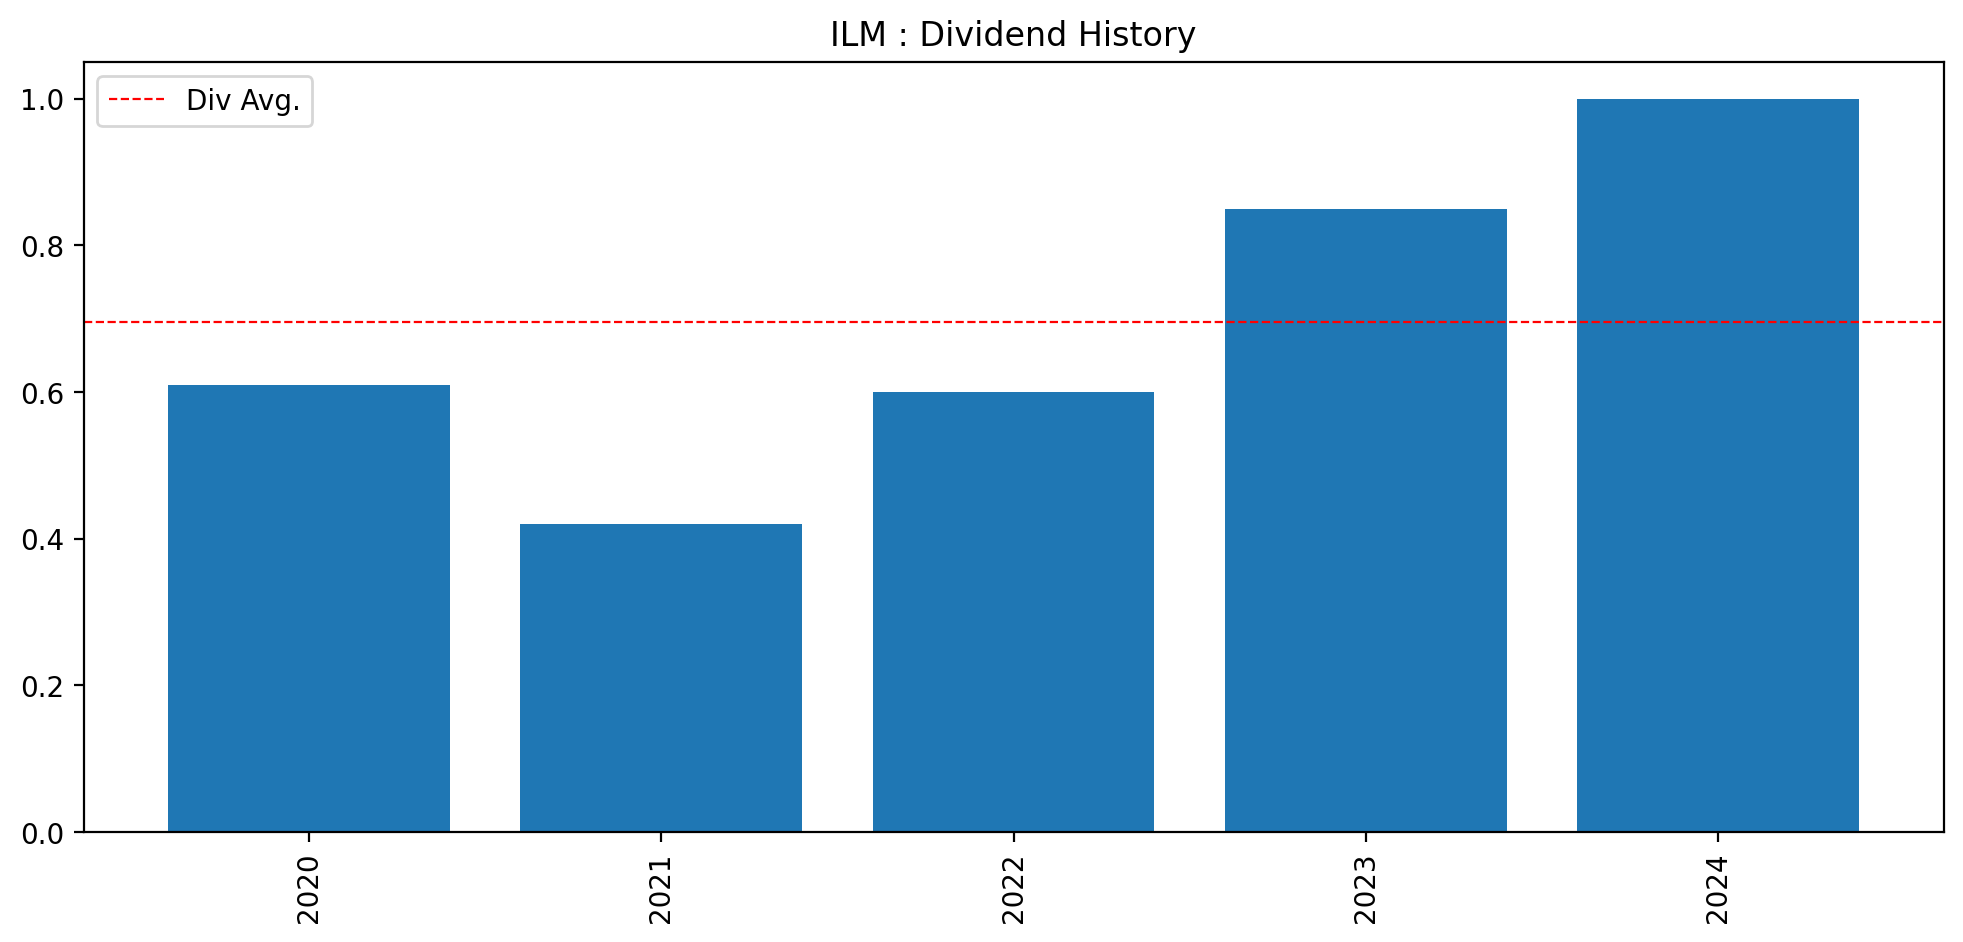

In [124]:
from datetime import datetime
plt.subplots(figsize=(12,5))
plt.title(f'{symbol} : Dividend History')

mean_ = divYear['Dividends'].mean()

plt.bar(x=divYear.index,height=divYear['Dividends'])
plt.axhline(mean_, color='red',linewidth=0.8,linestyle='--',label='Div Avg.')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [126]:
# ประเมินมูลค่าหุ้น ด้วย Dividend Discount Model
# กำหนด ผลตอบแทนที่ต้องการ คือ 10%
P0,growth_rate,D1 = Dividend_Discount_Model(divYear,requiredRateReturn=0.15)
# print(f'P0 = {round(P0,2)}')
print(f'Dividend Growth Rate = {round(growth_rate*100,2)}%')
print(f'Dividend Year {divYear.head(1).index[0]} : {divYear.head(1)['Dividends'].values[0]}')
print(f'Dividend Year {divYear.tail(1).index[0]} : {divYear.tail(1)['Dividends'].values[0]}')

Dividend Growth Rate = 10.39%
Dividend Year 2020 : 0.61
Dividend Year 2024 : 1.0


In [66]:
0.61*(1.1039)**5

0.9999504996212493

In [134]:
mean_

0.696